In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import keras
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [5]:
keras.backend.backend()

'mxnet'

# Save VGG16 PreTrained Model

For this demo of loading a pre-trained model and running inference in EIA, we will just download a Keras pre-trained VGG16 model on ImageNet. Save the model as Keras model (h5 file). 

In [6]:
# Load a ImageNet Pre-Trained VGG-16
model = VGG16(weights='imagenet', input_shape=(224,224,3))
model.save("imagenet_vgg16.h5")

# Prepare Sample Inputs

In [7]:
# Download an Elephant Image

In [8]:
!wget -O tusker.jpeg http://www.krugerpark.co.za/images/kt-19-big-tuskers-1.jpg

--2019-03-28 23:49:06--  http://www.krugerpark.co.za/images/kt-19-big-tuskers-1.jpg
Resolving www.krugerpark.co.za (www.krugerpark.co.za)... 107.170.183.126
Connecting to www.krugerpark.co.za (www.krugerpark.co.za)|107.170.183.126|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13018 (13K) [image/jpeg]
Saving to: ‘tusker.jpeg’

tusker.jpeg         100%[===================>]  12.71K  --.-KB/s    in 0.1s    

2019-03-28 23:49:06 (117 KB/s) - ‘tusker.jpeg’ saved [13018/13018]



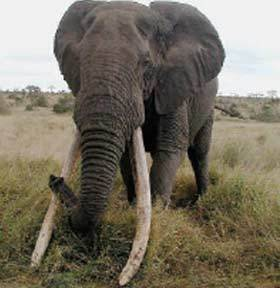

In [9]:
from IPython.display import Image
Image(filename='tusker.jpeg')

In [10]:
!wget -O racecar.jpeg https://cdn.cnn.com/cnnnext/dam/assets/180130144240-formula-e-car-gen2-front-facing-large-169.jpg

--2019-03-28 23:49:07--  https://cdn.cnn.com/cnnnext/dam/assets/180130144240-formula-e-car-gen2-front-facing-large-169.jpg
Resolving cdn.cnn.com (cdn.cnn.com)... 104.68.99.104, 2600:1406:34:295::3134, 2600:1406:34:29d::3134
Connecting to cdn.cnn.com (cdn.cnn.com)|104.68.99.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18318 (18K) [image/jpeg]
Saving to: ‘racecar.jpeg’

racecar.jpeg        100%[===================>]  17.89K  --.-KB/s    in 0.003s  

2019-03-28 23:49:07 (6.20 MB/s) - ‘racecar.jpeg’ saved [18318/18318]



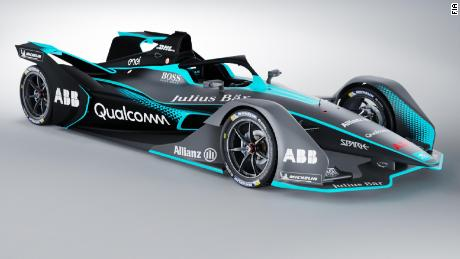

In [11]:
from IPython.display import Image
Image(filename='racecar.jpeg')

# Perform Prediction with Keras APIs

## Load the Keras Model from file

In [12]:
model = keras.models.load_model("imagenet_vgg16.h5", context="eia")

## Prepare Inputs for Prediction

In [63]:
racecar = image.load_img("racecar.jpeg", target_size=(224, 224))
racecar = image.img_to_array(racecar)
racecar = np.expand_dims(racecar, axis=0)
racecar = preprocess_input(racecar)

In [67]:
tusker = image.load_img("tusker.jpeg", target_size=(224, 224))
tusker = image.img_to_array(tusker)
tusker = np.expand_dims(tusker, axis=0)
tusker = preprocess_input(tusker)

## Single Prediction Example

In [69]:
preds = model.predict(racecar)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n04037443', 'racer', 0.88579184), ('n04285008', 'sports_car', 0.104770236), ('n02974003', 'car_wheel', 0.008486765)]


In [70]:
preds = model.predict(tusker)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n01871265', 'tusker', 0.63174385), ('n02504458', 'African_elephant', 0.35999662), ('n02504013', 'Indian_elephant', 0.008235933)]


## Batch Prediction Example

In [71]:
batch_input = np.concatenate((racecar, tusker), axis=0)

In [72]:
batch_input.shape

(2, 224, 224, 3)

In [73]:
batch_preds = model.predict_on_batch(batch_input)

In [74]:
for pred in decode_predictions(batch_preds, top=3):
    print('Predicted:', pred)

Predicted: [('n04037443', 'racer', 0.88579184), ('n04285008', 'sports_car', 0.104770236), ('n02974003', 'car_wheel', 0.008486765)]
Predicted: [('n01871265', 'tusker', 0.63174385), ('n02504458', 'African_elephant', 0.35999662), ('n02504013', 'Indian_elephant', 0.008235933)]
